In [3]:
import pandas as pd

## 1. Loading data

In [4]:
job_posting_path = "D:\project\Job_Posting_Analysis\data\job_postings.csv"
job_skill_path = "D:\project\Job_Posting_Analysis\data\job_skills.csv"
job_summary_path = "D:\project\Job_Posting_Analysis\data\job_summary.csv"

In [5]:
job_posting = pd.read_csv(job_posting_path)
job_skill = pd.read_csv(job_skill_path)
job_summary = pd.read_csv(job_summary_path)

## 2. Check data summary and missing value


In [6]:
job_posting.head()

,job_link,last_processed_time,last_status,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/senior-mach...,2024-01-21 08:08:48.031964+00,Finished NER,t,t,f,Senior Machine Learning Engineer,Jobs for Humanity,"New Haven, CT",2024-01-14,East Haven,United States,Agricultural-Research Engineer,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/principal-s...,2024-01-20 04:02:12.331406+00,Finished NER,t,t,f,"Principal Software Engineer, ML Accelerators",Aurora,"San Francisco, CA",2024-01-14,El Cerrito,United States,Set-Key Driver,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/senior-etl-...,2024-01-21 08:08:31.941595+00,Finished NER,t,t,f,Senior ETL Data Warehouse Specialist,Adame Services LLC,"New York, NY",2024-01-14,Middletown,United States,Technical Support Specialist,Associate,Onsite
3,https://www.linkedin.com/jobs/view/senior-data...,2024-01-20 15:30:55.796572+00,Finished NER,t,t,f,Senior Data Warehouse Developer / Architect,Morph Enterprise,"Harrisburg, PA",2024-01-12,Lebanon,United States,Architect,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/lead-data-e...,2024-01-21 08:08:58.312124+00,Finished NER,t,t,f,Lead Data Engineer,Dice,"Plano, TX",2024-01-14,McKinney,United States,Maintenance Data Analyst,Mid senior,Onsite


In [7]:
job_skill.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/senior-mach...,"Machine Learning, Programming, Python, Scala, ..."
1,https://www.linkedin.com/jobs/view/principal-s...,"C++, Python, PyTorch, TensorFlow, MXNet, CUDA,..."
2,https://www.linkedin.com/jobs/view/senior-etl-...,"ETL, Data Integration, Data Transformation, Da..."
3,https://www.linkedin.com/jobs/view/senior-data...,"Data Lakes, Data Bricks, Azure Data Factory Pi..."
4,https://www.linkedin.com/jobs/view/lead-data-e...,"Java, Scala, Python, RDBMS, NoSQL, Redshift, S..."


In [8]:
job_summary.head()

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/senior-mach...,Company Description\nJobs for Humanity is part...
1,https://www.linkedin.com/jobs/view/principal-s...,Who We Are\nAurora (Nasdaq: AUR) is delivering...
2,https://www.linkedin.com/jobs/view/senior-etl-...,"Location: New York City, NY\nPosition Summary\..."
3,https://www.linkedin.com/jobs/view/senior-data...,Responsibilities:\nCandidate must have signifi...
4,https://www.linkedin.com/jobs/view/lead-data-e...,Dice is the leading career destination for tec...


In [9]:
print(f"Shape of job_posting : { job_posting.shape}"),
print(f"Shape of job_skill : {job_skill.shape}")
print(f"Shape of job_summary : {job_summary.shape}")

Shape of job_posting : (12217, 15)
Shape of job_skill : (12217, 2)
Shape of job_summary : (12217, 2)


#### 2.1 Check missing


In [13]:
job_skill.isna().sum()

job_link      0
job_skills    5
dtype: int64

In [14]:
job_posting.isna().sum()

job_link               0
last_processed_time    0
last_status            0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           1
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64

In [10]:
job_summary.isna().sum()

job_link       0
job_summary    0
dtype: int64

In [15]:
# Drop missing column for simplicity
job_skill.dropna(inplace=True)
job_posting.dropna(inplace=True)

In [12]:
# Join 3 table on primary key "job_link"
merge = pd.merge(job_posting,job_skill,on = 'job_link')
df = pd.merge(merge,job_summary, on='job_link')

In [25]:
job_posting.columns

Index(['job_link', 'last_processed_time', 'last_status', 'got_summary',
       'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location',
       'first_seen', 'search_city', 'search_country', 'search_position',
       'job_level', 'job_type'],
      dtype='object')

## 3. Data Analysis



#### 3.1 Some common plot


In [13]:

import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\caoqu\AppData\Local\Temp\ipykernel_22820\121912374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="search_country", data = df, palette=['r', 'g', 'b', 'y'])


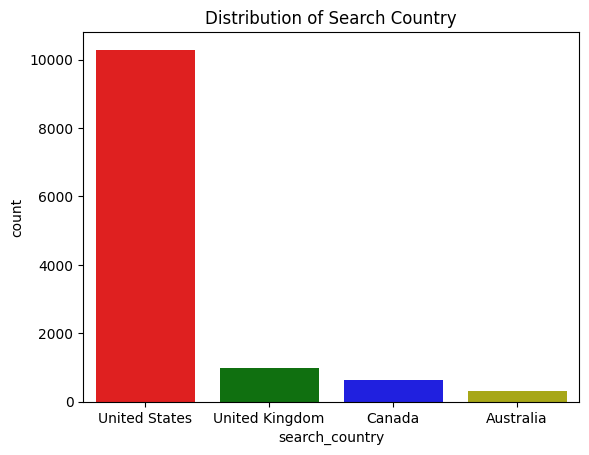

In [16]:
sns.countplot(x="search_country", data = df, palette=['r', 'g', 'b', 'y'])
plt.title("Distribution of Search Country")
plt.show()

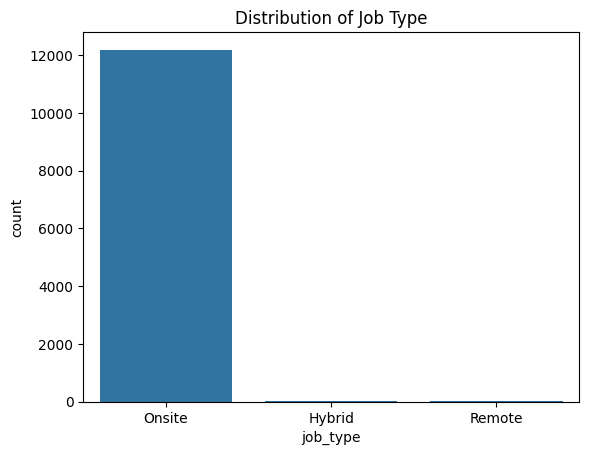

In [20]:
sns.countplot(x='job_type', data = df)
plt.title("Distribution of Job Type")
plt.show()

- Most of the job are onsite !


C:\Users\caoqu\AppData\Local\Temp\ipykernel_22820\1813348266.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job_level', data = df,palette=['r', 'g'])


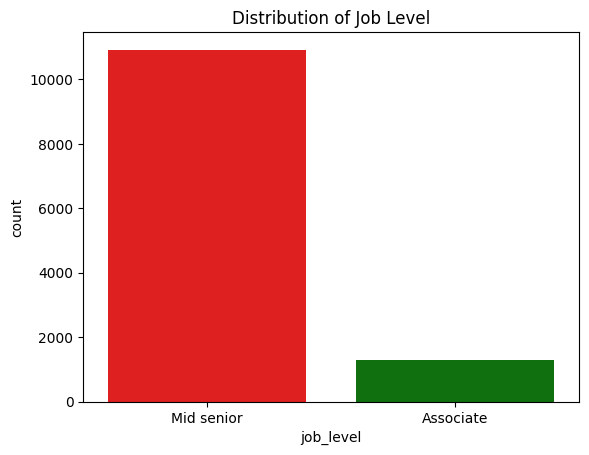

In [21]:
sns.countplot(x='job_level', data = df,palette=['r', 'g'])
plt.title("Distribution of Job Level")
plt.show()

#### 3.2 Skills Analysis

In [33]:
from collections import Counter
from difflib import SequenceMatcher, get_close_matches

In [28]:
df['job_skills'].dtype

dtype('O')

In [30]:
skills_list = ''
for skill in df.job_skills:
    skill = str(skill)
    skills_list += skill.lower()
skills_list = skills_list.split(', ')
skills_list[:10]

['machine learning',
 'programming',
 'python',
 'scala',
 'java',
 'data engineering',
 'distributed computing',
 'statistical modeling',
 'optimization',
 'data pipelines']

In [34]:
counts = Counter(skills_list) 
common_skills = counts.most_common(15)
common_skills

[('python', 4400),
 ('sql', 4220),
 ('communication', 2428),
 ('data analysis', 2334),
 ('data visualization', 2259),
 ('machine learning', 2026),
 ('tableau', 1644),
 ('aws', 1615),
 ('communication skills', 1607),
 ('project management', 1572),
 ('r', 1505),
 ('data modeling', 1427),
 ('spark', 1372),
 ('problem solving', 1363),
 ('data warehousing', 1316)]

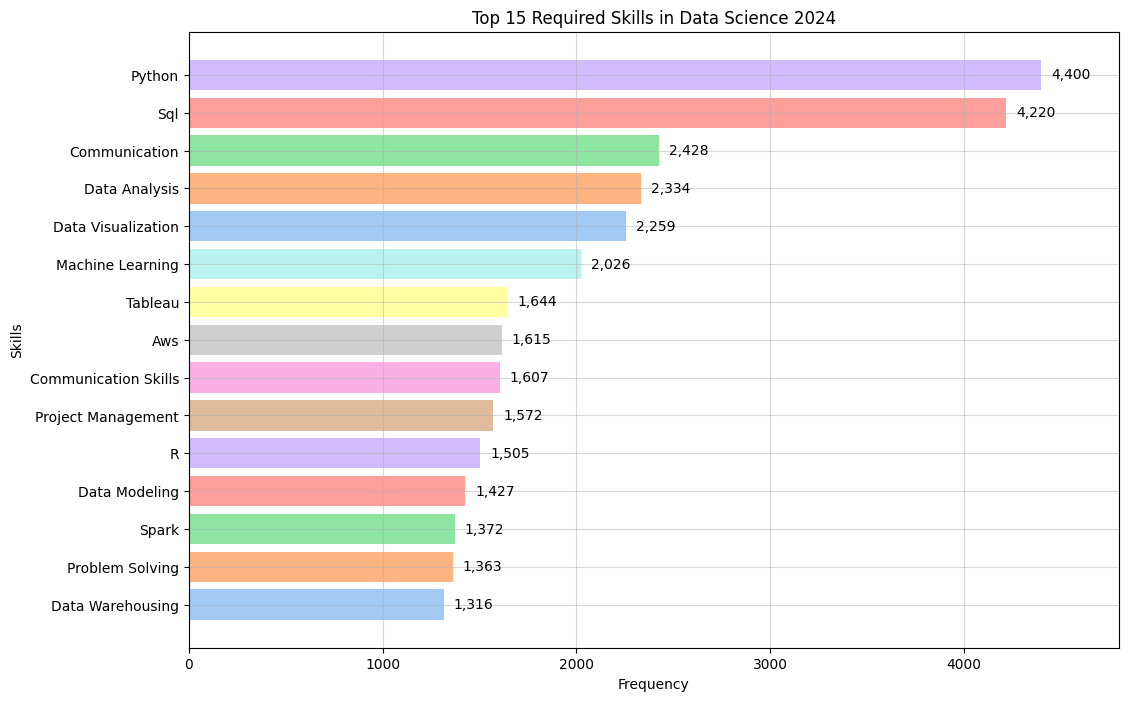

In [35]:
labels, values = zip(*common_skills)
labels = [label.title() for label in labels]
plt.figure(figsize=(12, 8))
bars = plt.barh(labels[::-1], values[::-1], color=sns.color_palette("pastel"))

for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 50
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f"{width:,.0f}", va='center', color='black')

plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Top 15 Required Skills in Data Science 2024', color='black')

plt.grid(axis='both', linestyle='-', alpha=0.5)

plt.xlim(0, 4800)
plt.show()

#### 3.3  Most common tool


In [46]:
def plot_pie_chart(counts_dict, title="Popularity Comparison"):
    """
    pie chart based on the counts of skills
    
    :param counts_dict: dictionary of labels and their counts.
    :param title: title of the pie chart.
    """
    # 'explode' slices for better visual clarity between pies
    explode = (0.05,) * len(counts_dict)

    fig, ax = plt.subplots(figsize=(10, 8))
    wedges, texts, autotexts = ax.pie(counts_dict.values(),
                                      autopct='%1.1f%%', startangle=90,
                                      colors=["b", "g", "r"],
                                      explode=explode, shadow=True)
    
    # legend with counts
    legend_labels = [f'{key}: {value}' for key, value in counts_dict.items()]
    
    ax.legend(wedges, legend_labels,
              title="Frameworks",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    
    # autopct text and labels with bold font weight
    plt.setp(autotexts, size=10, weight="bold") 
    plt.setp(texts, size=12, weight="bold") 

    plt.title(title, fontsize=18, color='black', fontweight='bold')
    plt.axis('equal')  
    
    plt.show()

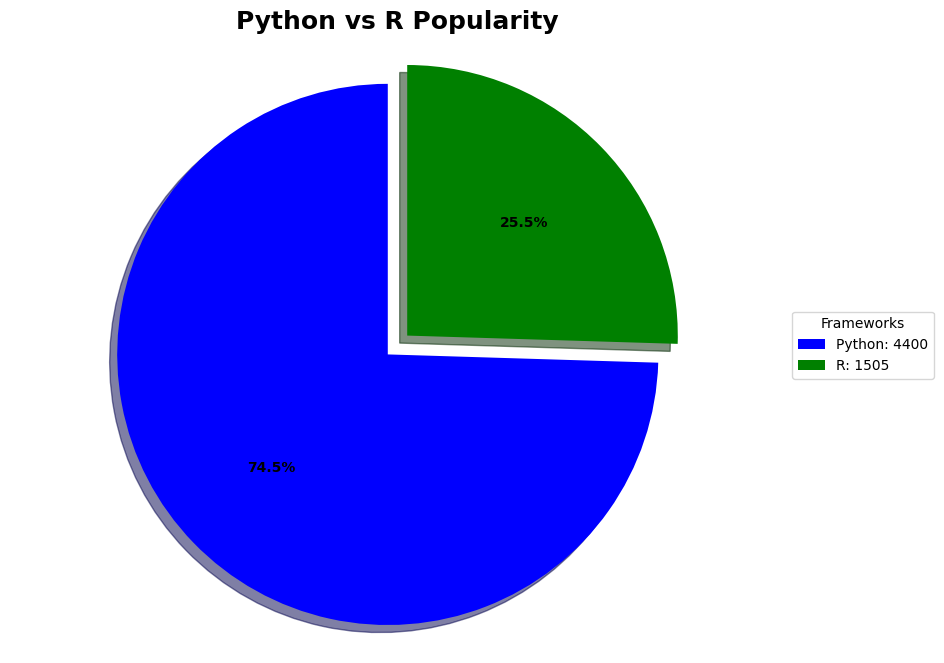

In [47]:
example_counts = {'Python': counts['python'], 'R': counts['r']}
plot_pie_chart(example_counts, "Python vs R Popularity")

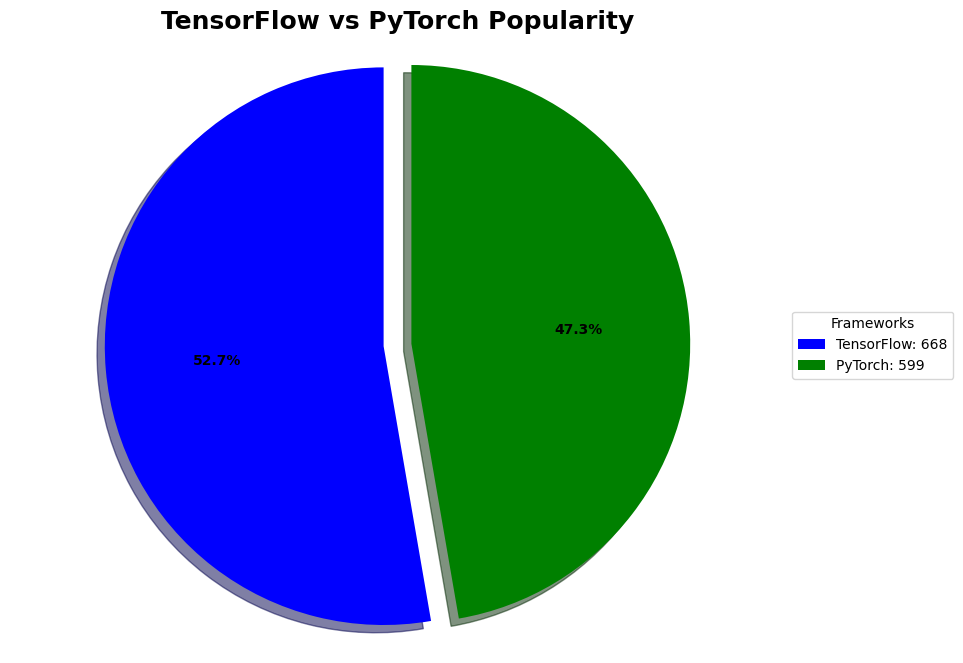

In [48]:
example_counts = {'TensorFlow': counts['tensorflow'], 'PyTorch': counts['pytorch']}
plot_pie_chart(example_counts, "TensorFlow vs PyTorch Popularity")

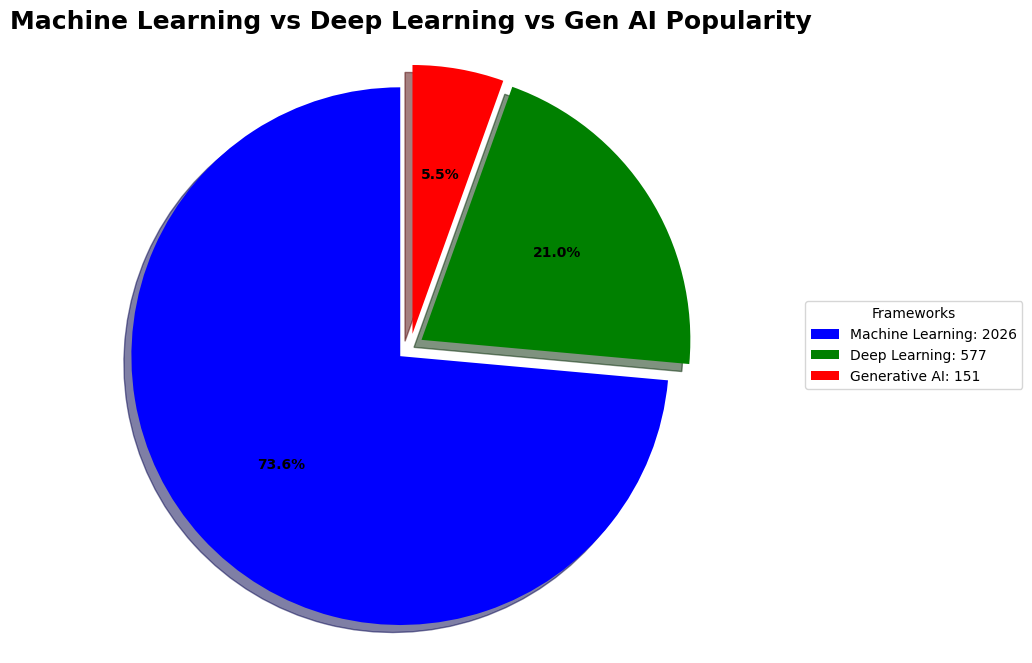

In [49]:
example_counts = {'Machine Learning': counts['machine learning'], 'Deep Learning': counts['deep learning'], 'Generative AI': counts['generative ai']}
plot_pie_chart(example_counts, "Machine Learning vs Deep Learning vs Gen AI Popularity")